[Regression with a Flood Prediction Dataset](https://www.kaggle.com/competitions/playground-series-s4e5)

Welcome to the 2024 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting an approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.

**Your Goal**: The goal of this competition is to predict the probability of a region flooding based on various factors.



**Result**: 787/1758 (44.77%)

In [ ]:
pip install seaborn

In [1]:
import pandas as pd

train_df = pd.read_csv(r"..\data\playground-series-s4e5\train.csv")
test_df = pd.read_csv(r"..\data\playground-series-s4e5\test.csv")

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [ ]:
import seaborn as sns

sample_df = train_df[:1000]
sns.pairplot(data=sample_df, diag_kind='kde')


### Checking the skewness

There seems to be no skewness of the target variable, so we do not need to perform any logarithmic transformation of the variable.

C:\Users\Noud\AppData\Local\Temp\ipykernel_14232\3988159690.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.FloodProbability, bins=100)


<Axes: xlabel='FloodProbability', ylabel='Density'>

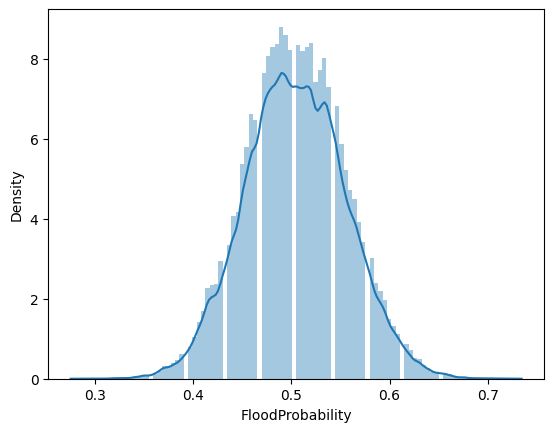

In [3]:
import seaborn as sns

sns.distplot(train_df.FloodProbability, bins=100)


### Checking the correlation of the variables.

We can see there are no significant correlations between any of the predictor variables and the target variable "FloodProbability".

<Axes: >

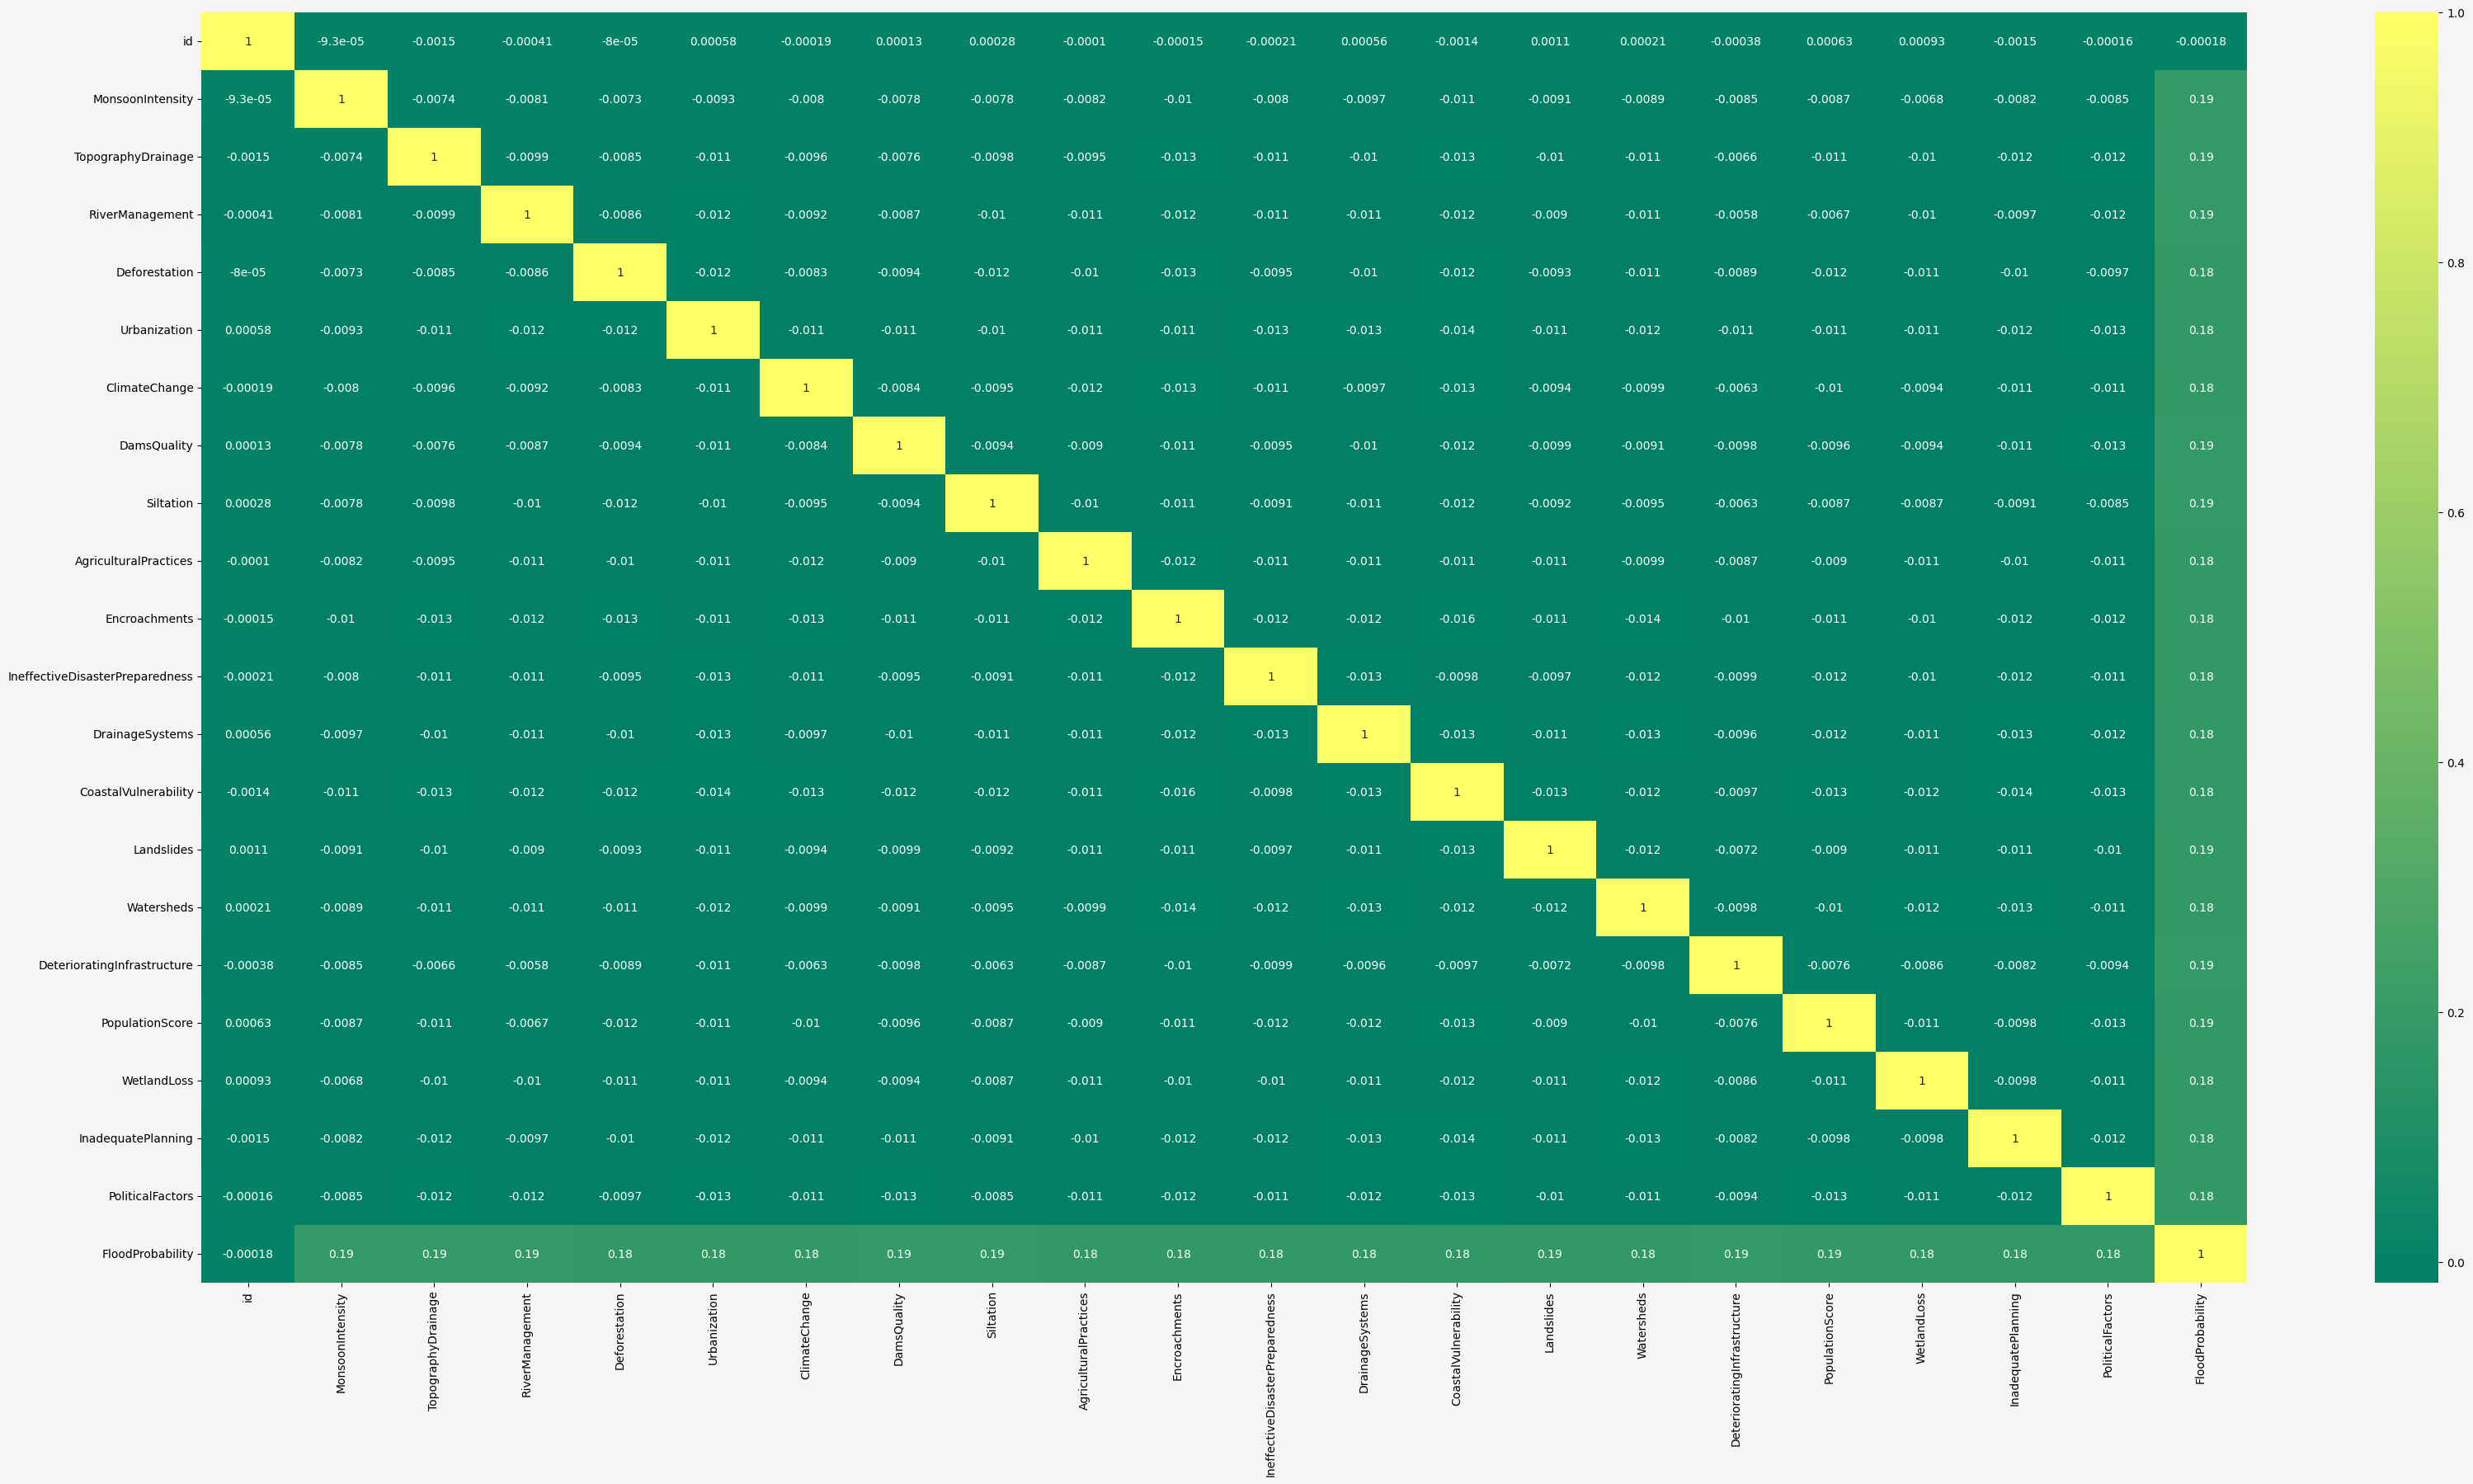

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = [40, 20], facecolor = "#F7F4F4")
sns.heatmap(train_df.corr(), annot = True, cmap = "summer")

# We zien dat alle variabelen een matige impact hebben op FloodProbability. We hoeven dus geen variabelen eruit te halen vooralsnog.

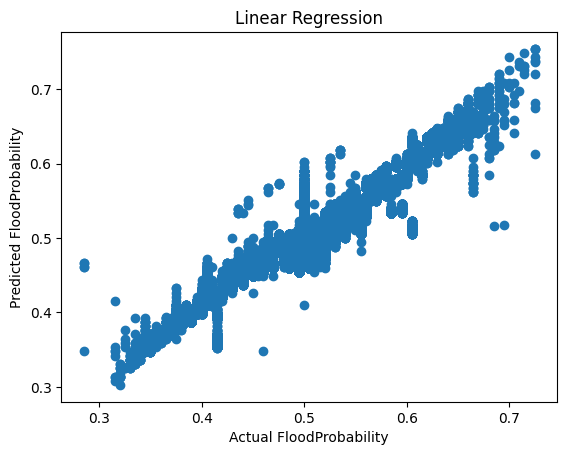

Multi linear regression: 
R2-score: 0.8448804301273027
MAE: 0.01579308667201207
RMSE: 0.020079804414849082


array([1.70568388, 1.79486863, 1.68625737, ..., 1.70557505, 1.63930426,
       1.65847727])

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np

# Predict Rings using all variables with correlation greater than 0.5 or less than -0.5 with Rings
X = train_df.drop('FloodProbability', axis=1)
# Drop Rings from X
y = train_df['FloodProbability']


X_train,X_val,y_train,y_val = train_test_split(X,y, test_size = 0.2, random_state=42)

X_train,y_train = X, y

# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
predictions_linear_regression = linear_regression.predict(X_val)

# Show graph of predicted values vs actual values
plt.scatter(y_val, predictions_linear_regression)
plt.xlabel('Actual FloodProbability')
plt.ylabel('Predicted FloodProbability')
plt.title('Linear Regression')
plt.show()

print("Multi linear regression: ")
print("R2-score:", r2_score(y_val, predictions_linear_regression))
print("MAE:", mean_absolute_error(y_val, predictions_linear_regression))

# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
print("RMSE:", sqrt(mean_squared_error(y_val, predictions_linear_regression)))

# Create list of predictions without the fixed skewness
predictions_linear_regression_no_skewness = np.exp(predictions_linear_regression)
predictions_linear_regression_no_skewness

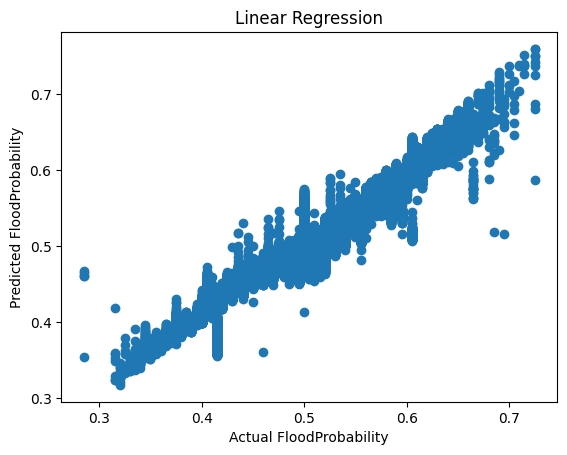

Catboost Regression: 
R2-score: 0.8494418761904392
MAE: 0.01565574694778918
RMSE: 0.01978236813267218


In [11]:
from catboost import CatBoostRegressor

# train is the dataframe the train_set without the SalePrice column
X = train_df.drop('FloodProbability', axis=1)
# target_log is the SalePrice column
y = train_df['FloodProbability']

X_train,X_val,y_train,y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

X_train,y_train = X, y

# Cat Boost Regressor

cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                    eval_set = (X_val,y_val),
                    verbose = 0)
predictions_cat = cat_model.predict(X_val)

# Show graph of predicted values vs actual values
plt.scatter(y_val, predictions_cat)
plt.xlabel('Actual FloodProbability')
plt.ylabel('Predicted FloodProbability')
plt.title('Linear Regression')
plt.show()

print("Catboost Regression: ")
print("R2-score:", r2_score(y_val, predictions_cat))
print("MAE:", mean_absolute_error(y_val, predictions_cat))

# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
print("RMSE:", sqrt(mean_squared_error(y_val, predictions_cat)))

# Create list of predictions without the fixed skewness
predictions_cat_no_skewness = np.exp(predictions_cat)
y_val_no_skewness = np.exp(y_val)

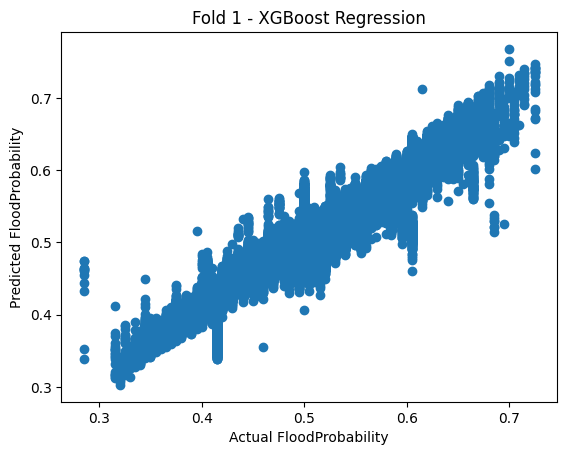

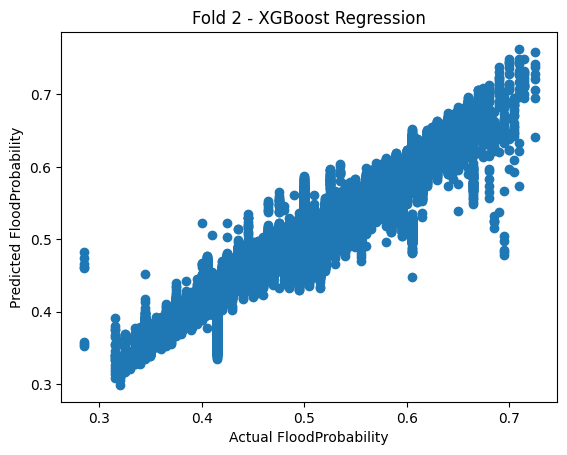

XGBoost Regression - Cross-validation R2 scores: [0.8349954996724355, 0.8348165750362473]
Mean R2-score across all folds: 0.8349060373543413
MAE: 0.01632927474364921
RMSE: 0.020733092063304644


In [42]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

# Assuming train_df is your DataFrame and 'FloodProbability' is the target variable

X = train_df.drop('FloodProbability', axis=1)
y = train_df['FloodProbability']

# Initialize k-fold cross-validation with 5 folds
kf = KFold(n_splits=2, shuffle=True, random_state=42)

# Initialize XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.1, 
                          learning_rate = 1,
                          max_depth = 10, 
                          alpha = 10, 
                          n_estimators = 200)

# List to store each fold's R2 score
r2_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on training data
    xg_reg.fit(X_train, y_train)
    
    # Predict on validation data
    val_predictions = xg_reg.predict(X_val)
    
    # Calculate R2 score and store it
    r2 = r2_score(y_val, val_predictions)
    r2_scores.append(r2)

    # Optionally, visualize each fold's predictions
    plt.scatter(y_val, val_predictions)
    plt.xlabel('Actual FloodProbability')
    plt.ylabel('Predicted FloodProbability')
    plt.title('Fold {} - XGBoost Regression'.format(len(r2_scores)))
    plt.show()

# Print results
print("XGBoost Regression - Cross-validation R2 scores:", r2_scores)
print("Mean R2-score across all folds:", np.mean(r2_scores))

# Calculate and print other statistics if needed (MAE, RMSE) on the last fold as an example
print("MAE:", mean_absolute_error(y_val, val_predictions))
print("RMSE:", sqrt(mean_squared_error(y_val, val_predictions)))

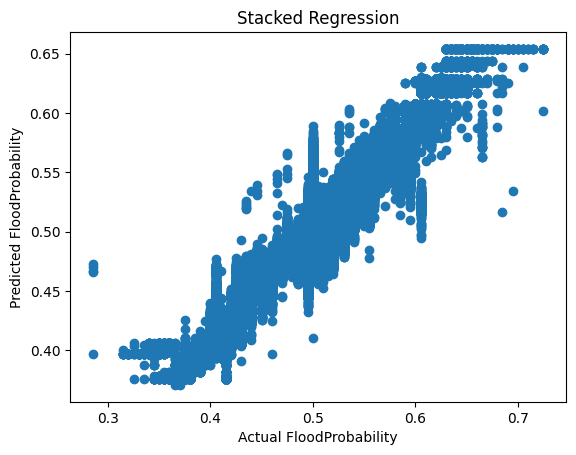

Stacked Model Performance:
R2-score: 0.8606017169709509
MAE: 0.01488760886195969
RMSE: 0.019035088252307326


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

# Assuming train_df is your DataFrame and 'FloodProbability' is the target variable
X = train_df.drop('FloodProbability', axis=1)
y = train_df['FloodProbability']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
estimators = [
    ('xgboost', xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.1, 
                          learning_rate = 1,
                          max_depth = 10, 
                          alpha = 10, 
                          n_estimators = 200)),
    ('linear_reg', LinearRegression()),
]

# Create the stacking ensemble
stack_reg = StackingRegressor(estimators=estimators, final_estimator=xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.1, 
                          learning_rate = 1,
                          max_depth = 10, 
                          alpha = 10, 
                          n_estimators = 200), cv=5)

# Fit the stacking ensemble model
stack_reg.fit(X_train, y_train)

# Predict on validation data
val_predictions = stack_reg.predict(X_val)

# Visualization
plt.scatter(y_val, val_predictions)
plt.xlabel('Actual FloodProbability')
plt.ylabel('Predicted FloodProbability')
plt.title('Stacked Regression')
plt.show()

# Evaluation
print("Stacked Model Performance:")
print("R2-score:", r2_score(y_val, val_predictions))
print("MAE:", mean_absolute_error(y_val, val_predictions))
print("RMSE:", sqrt(mean_squared_error(y_val, val_predictions)))

In [ ]:
# Create submission

test_predictions = stack_reg.predict(test_df)

test_predictions = [prediction for prediction in test_predictions]


# Revert log transformation for "Rings" variable

list_of_ids = [id for id in test_df['id']]

test_predictions


In [9]:
import csv

# Writing data to CSV file
with open('output.csv', 'w', newline='') as csvfile:
    fieldnames = ['id', 'Rings']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for id, rings in zip(list_of_ids, test_predictions):
        writer.writerow({'id': id, 'Rings': rings})

print("CSV file 'output.csv' has been created successfully.")

CSV file 'output.csv' has been created successfully.
